# Example 1a: Tracking of a simulated single particle with DeepTrack 1.0

Example code to use DeepTrack to track a simulated single particle.
See also Figure 1.

<strong>DeepTrack 1.0</strong><br/>
Digital Video Microscopy enhanced with Deep Learning<br/>
version 1.0 - 30 November 2018<br/>
© Saga Helgadottir, Aykut Argun & Giovanni Volpe<br/>
[Soft Matter Lab](http://www.softmatterlab.org)

## 1. INITIALIZATION

In [1]:
import deeptrack

## 2. DEFINE AND CHECK IMAGE GENERATION ROUTINE

Here, we simulate images of a variety of single particles. The particle position is chosen randomly from a normal distribution with mean of 0 and standard deviation of 1 pixel. The particle has a radius between 1.5 and 3 pixels, and a point-spread function obtained from Bessel function of the first kind of first or second order with positive or negative intensity. The image background, SNR and gradient intensity are randomly selected from a wide range of values. This results in particle images corresponding to dark or bright spots or rings of different intensities on a brigth or dark background with varying SNR and gradient intensity. This image generator was used to train the pretraiend network saved in the file "DeepTrack - Example 1a - Pretrained network.h5".

Set the gradient intensity to zero to test the performance of the pretrained network as a function of SNR, as in <strong>Figure 1b</strong>. 

Set the the SNR to 50 to test the network as a function of gradient intensity, as in <strong>Figure 1c</strong>.

Comments:
1. The <strong>image_parameters_function</strong> is a lambda function that determines the kind of particle images for which the deep learning network will be trained. Tuning its parameters is the simplest way to improve the tracking performance.<br/>
2. The <strong>image_generator</strong> is a lambda function that works as image genrator. It does not need to be changed in most cases.<br/>
3. The parameter <strong>number_of_images_to_show</strong> determines the number of sample images that are shown.
4. The <font color=red><strong>red<strong></font> symbol superimposed to the images represents the ground truth particle position.

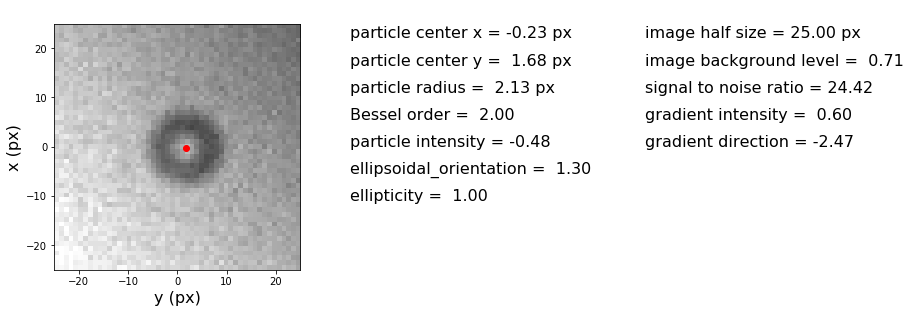

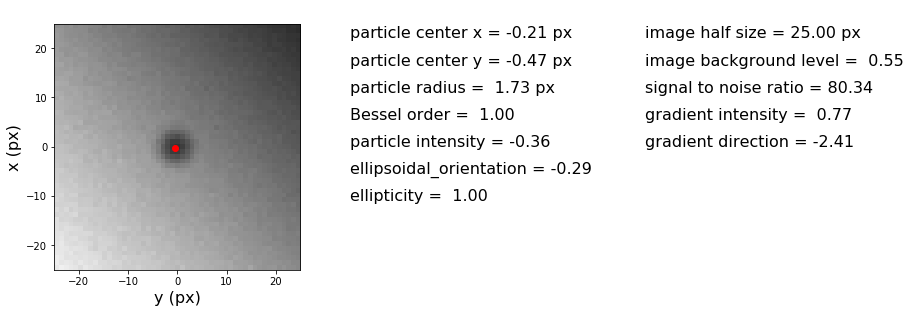

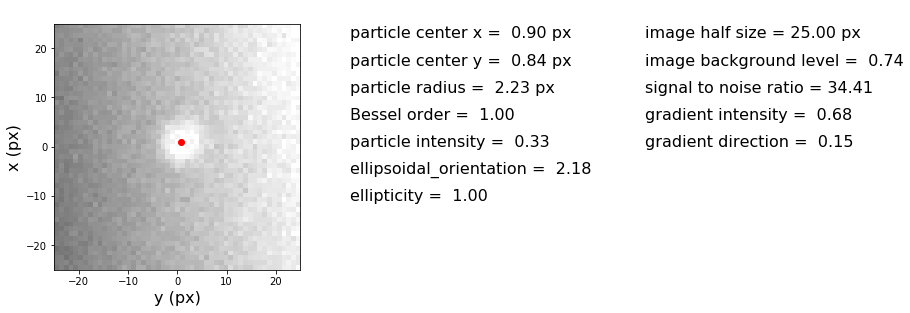

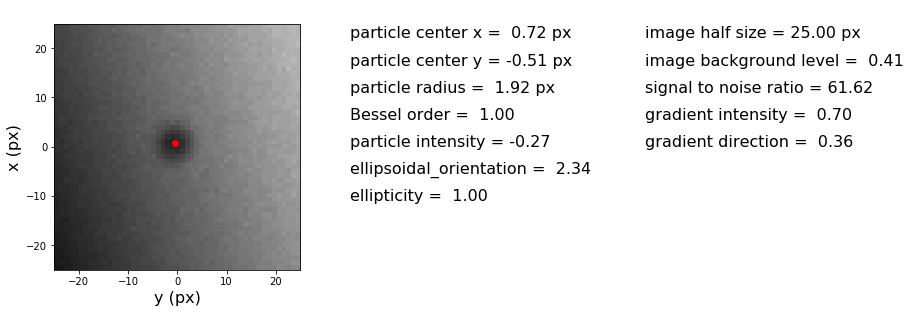

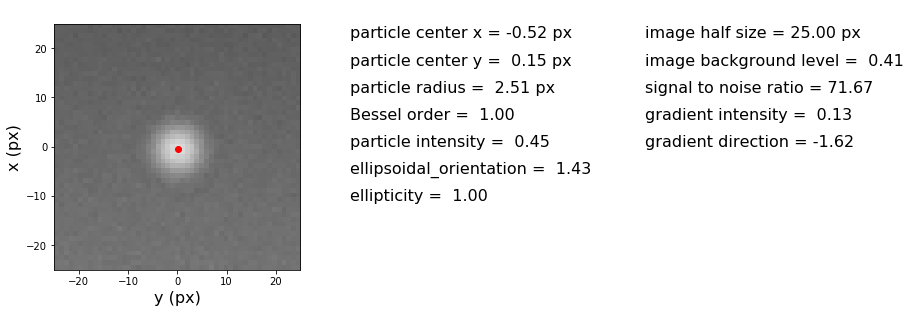

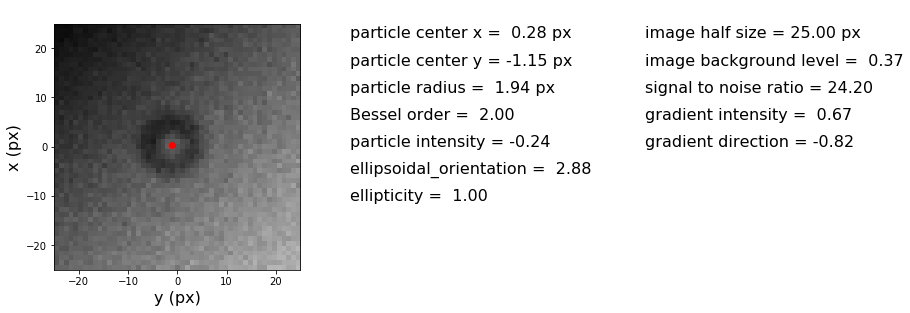

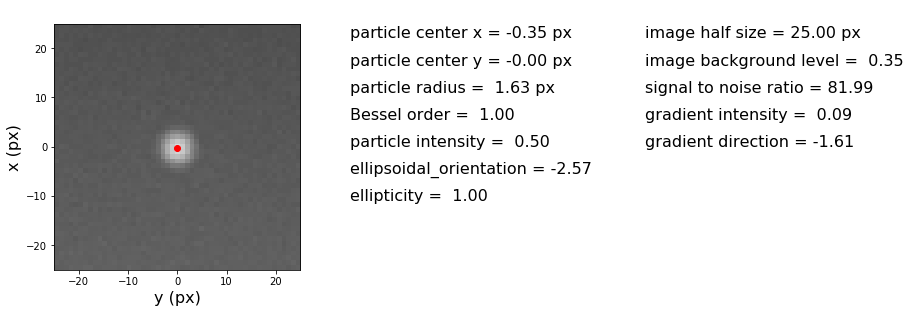

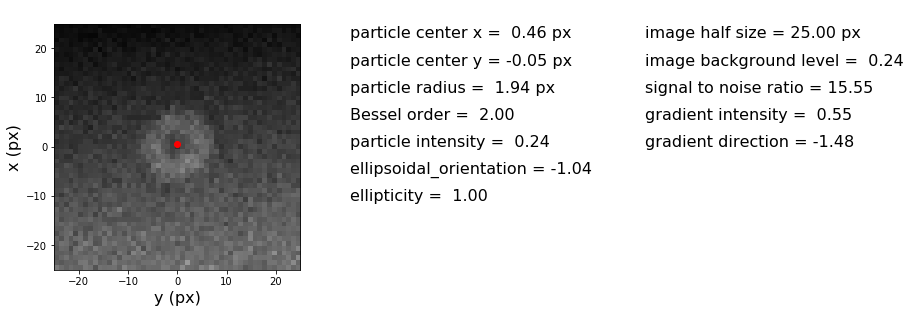

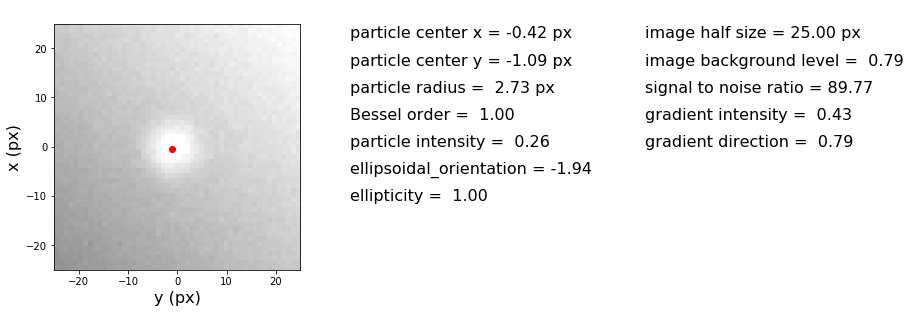

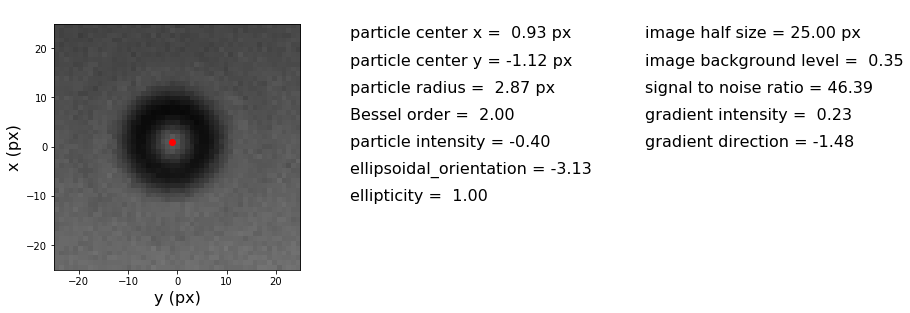

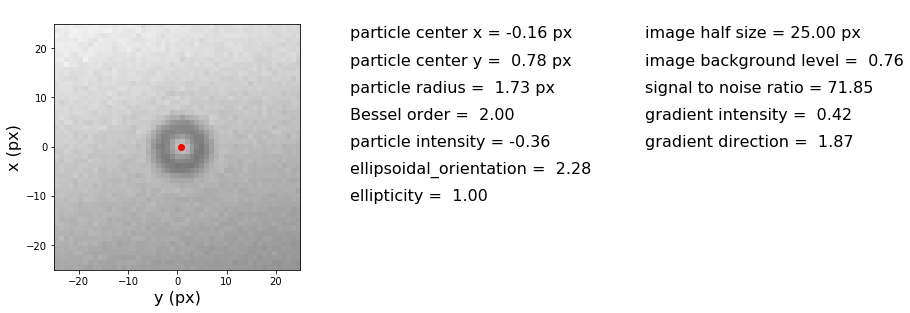

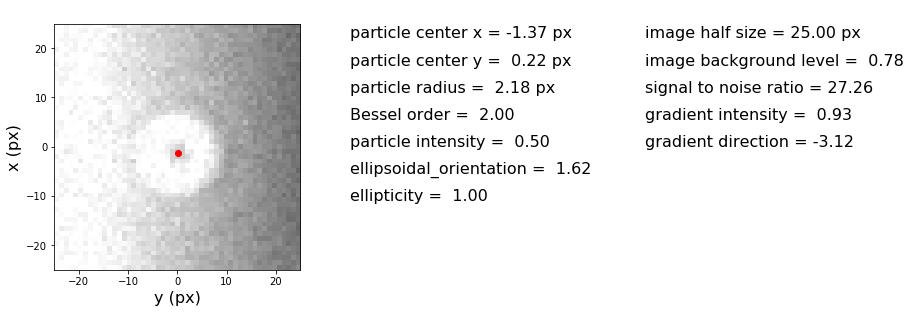

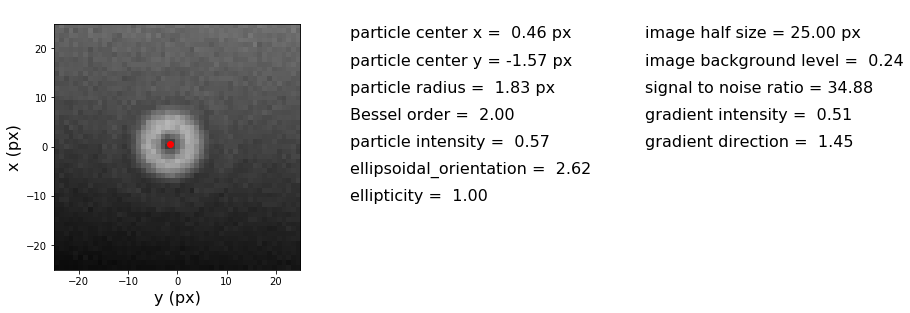

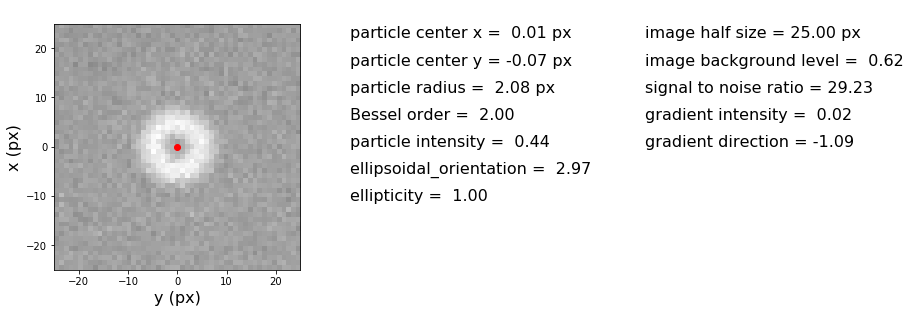

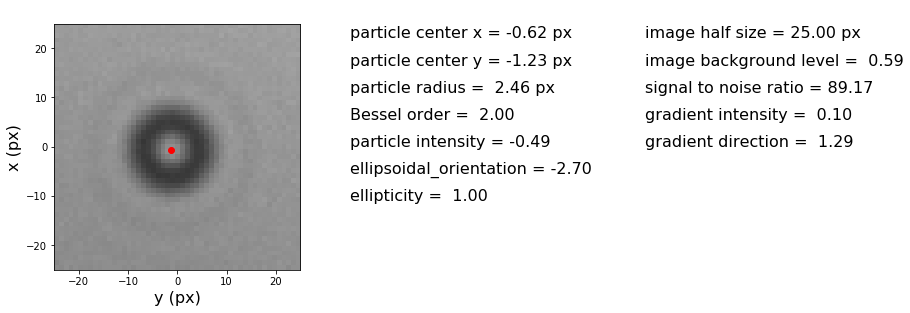

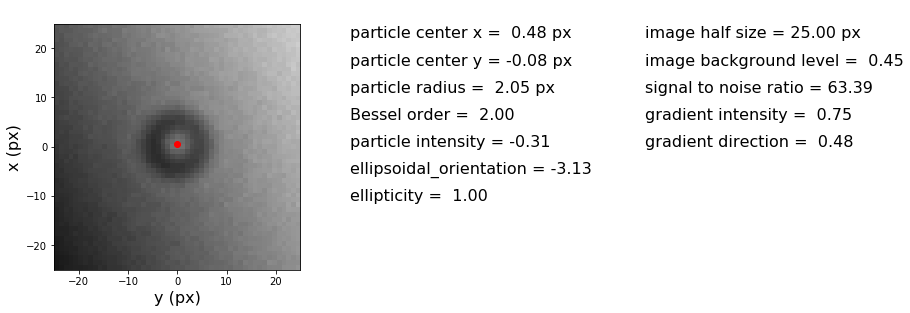

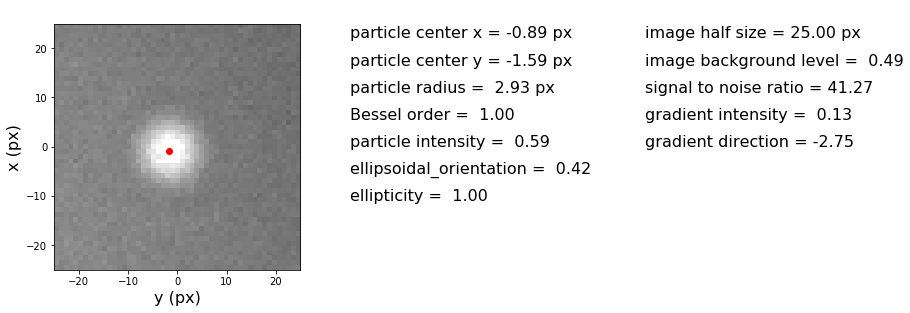

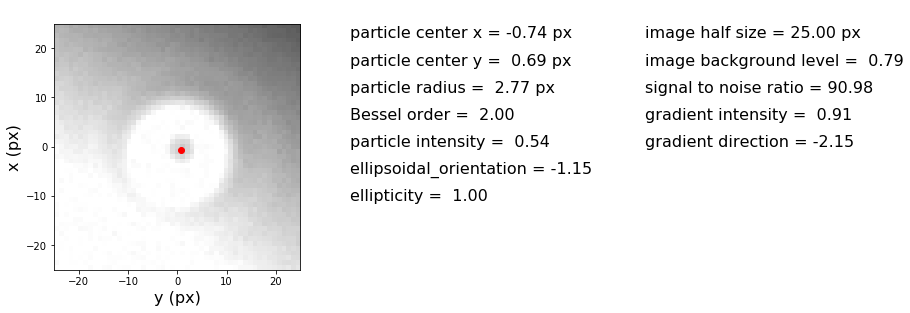

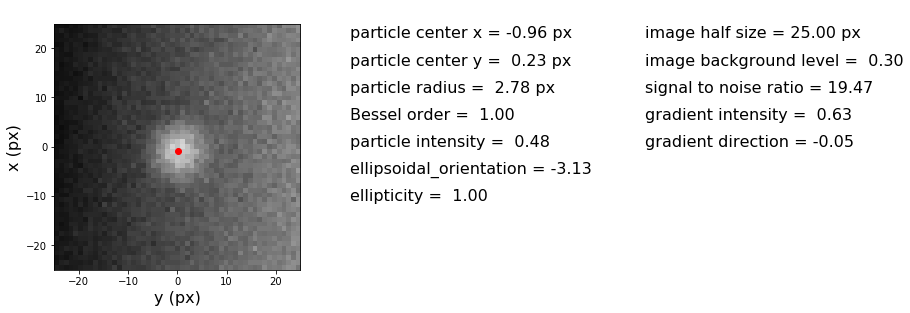

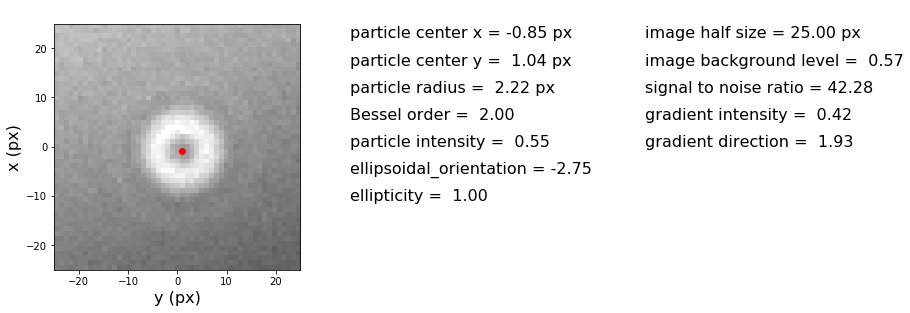

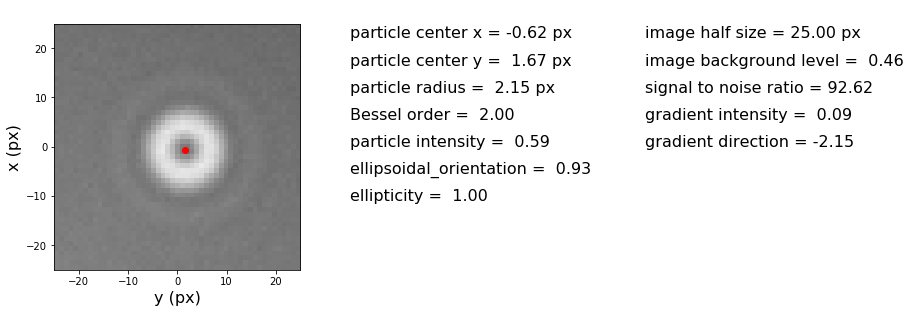

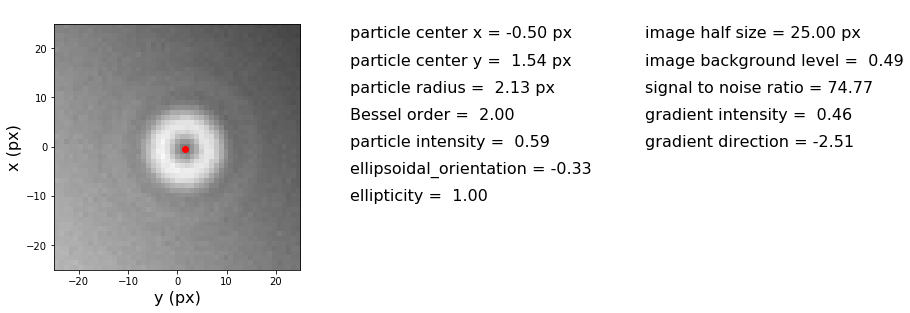

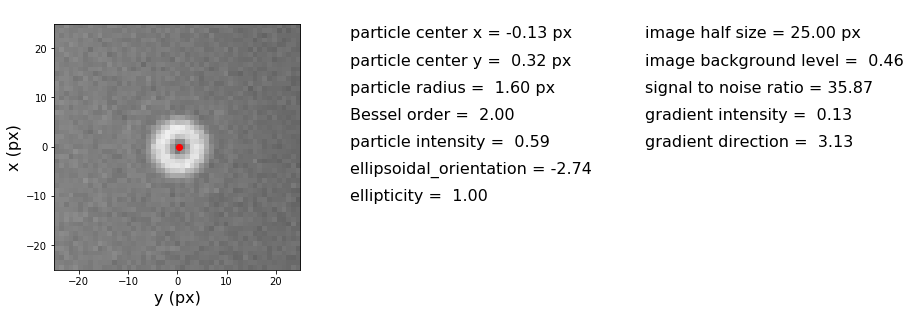

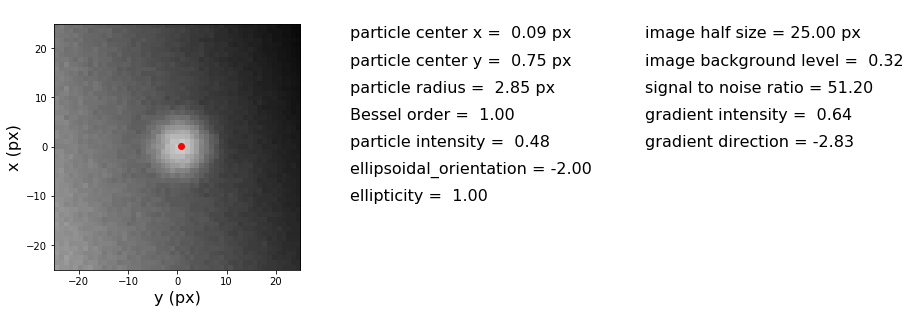

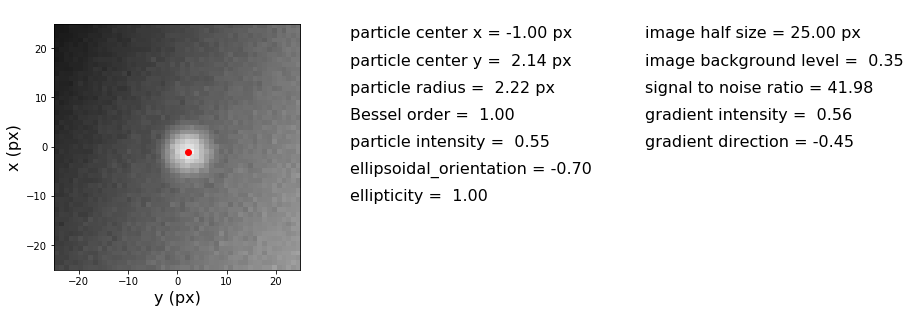

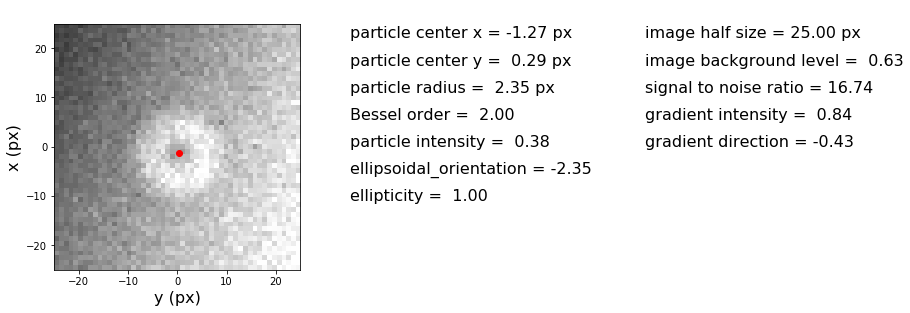

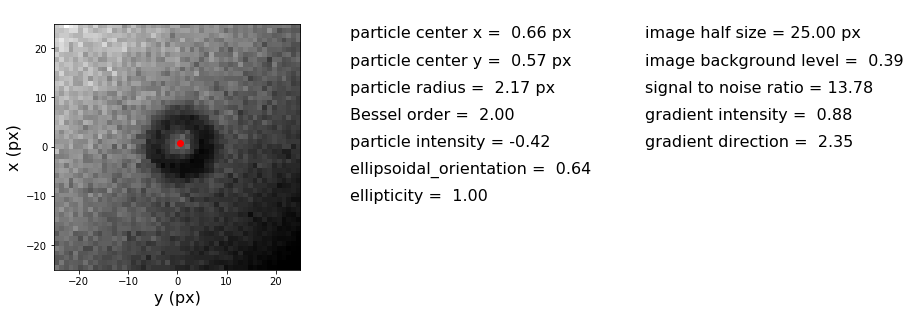

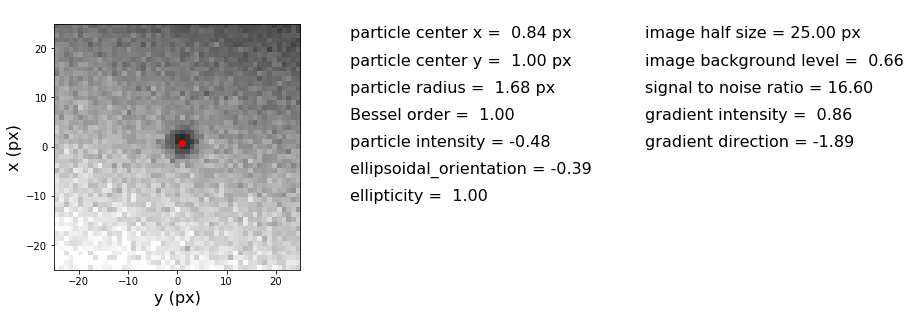

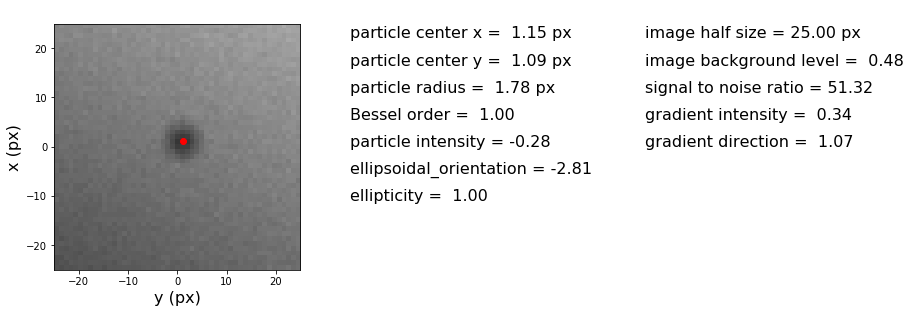

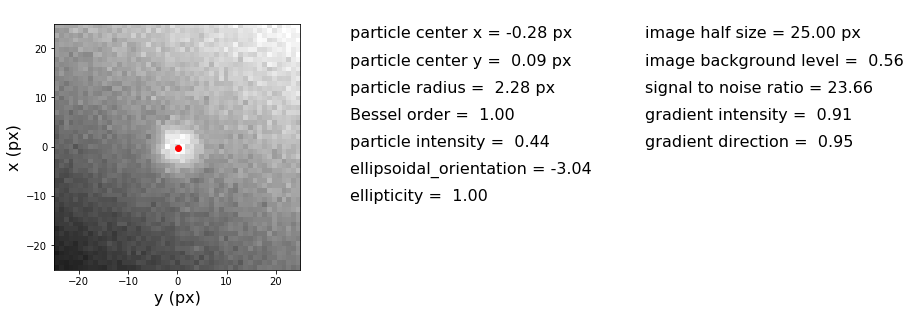

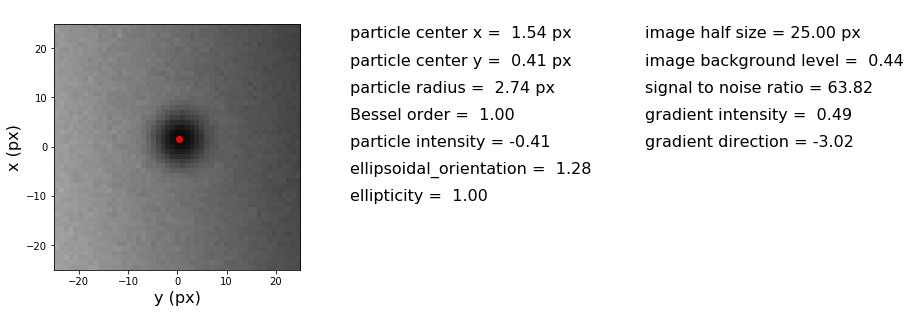

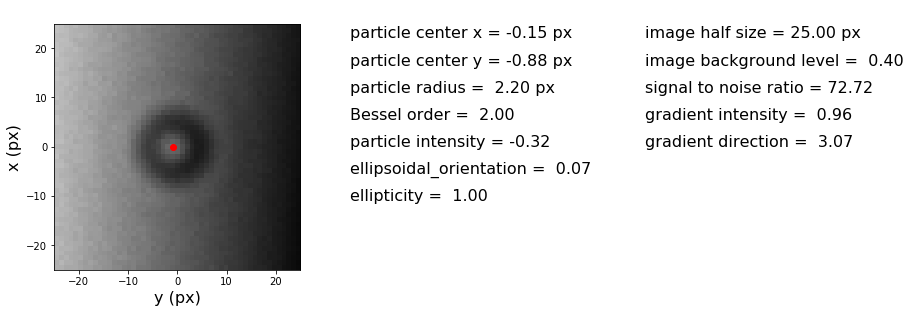

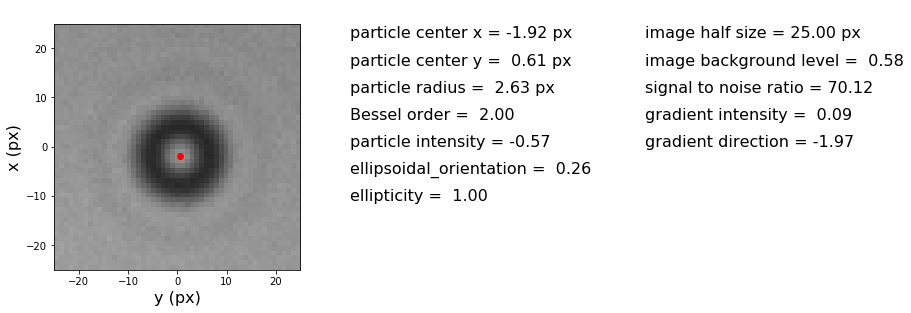

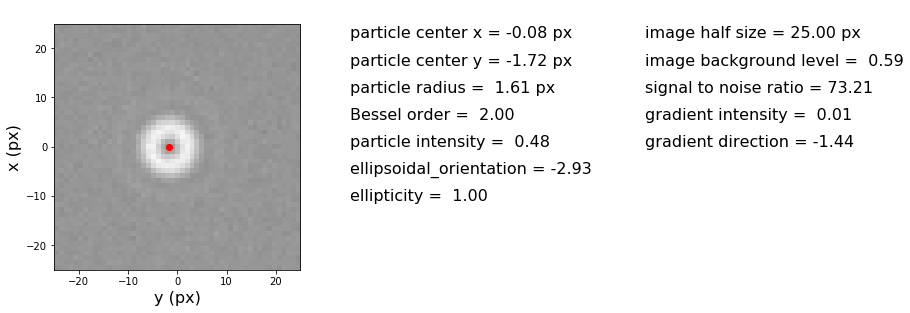

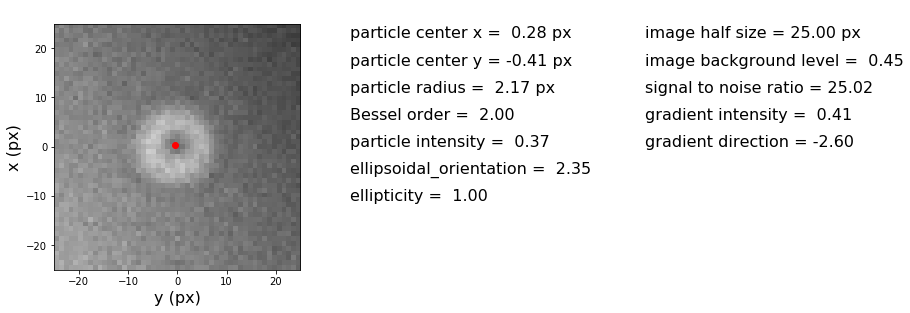

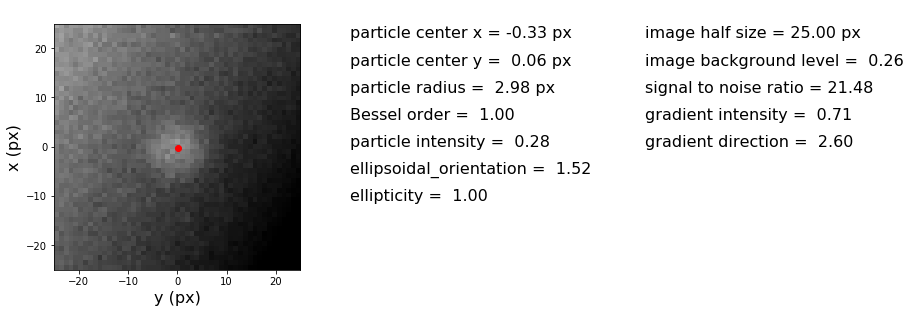

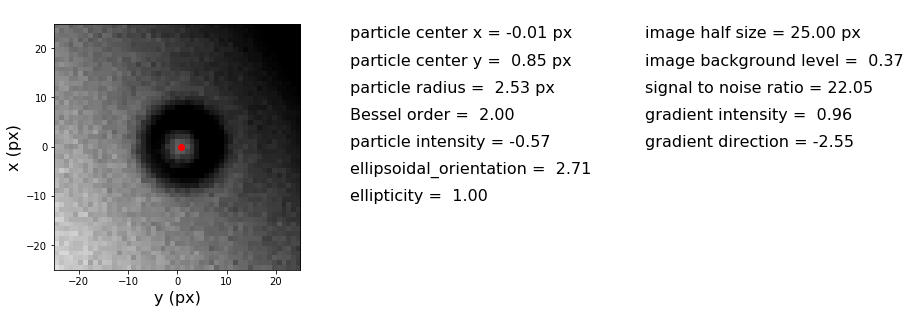

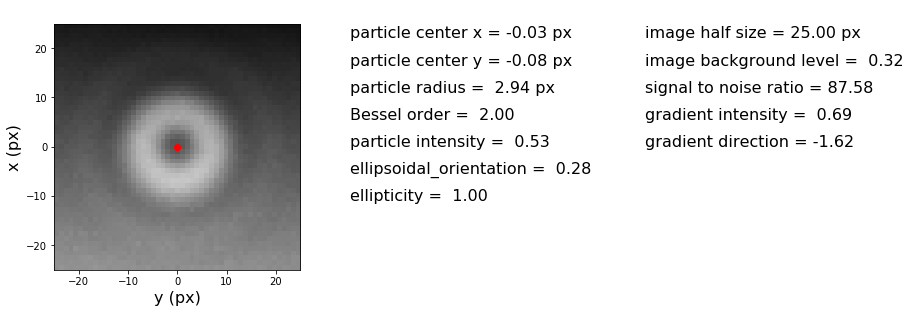

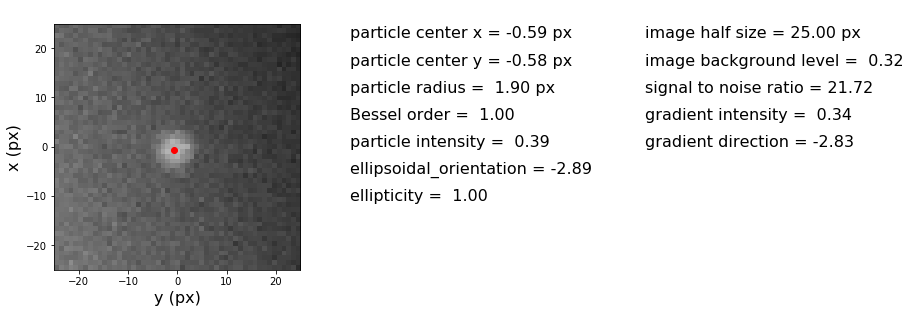

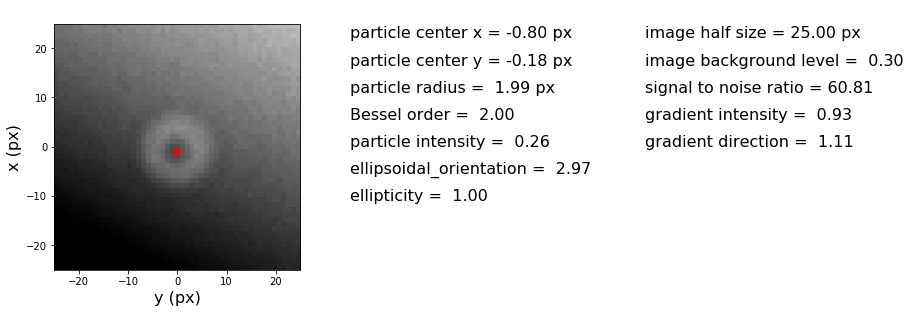

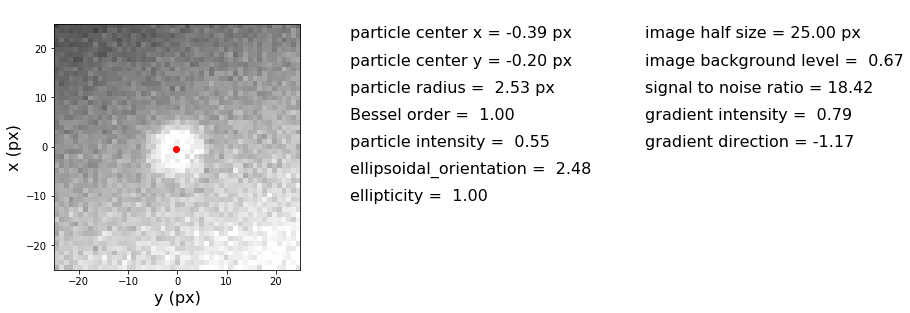

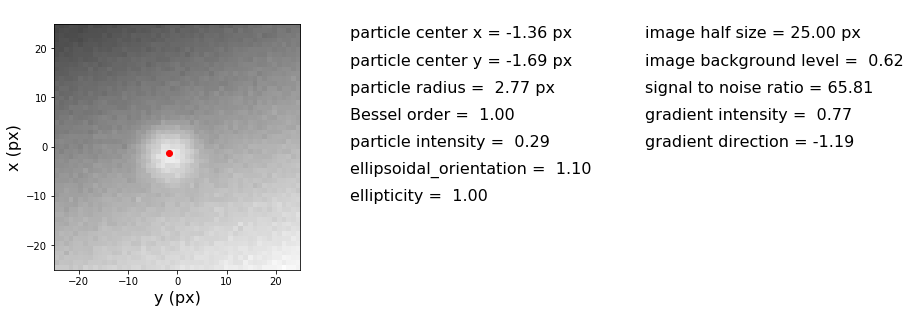

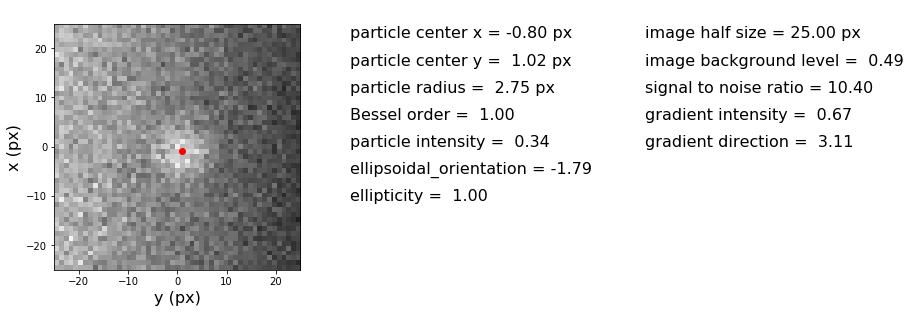

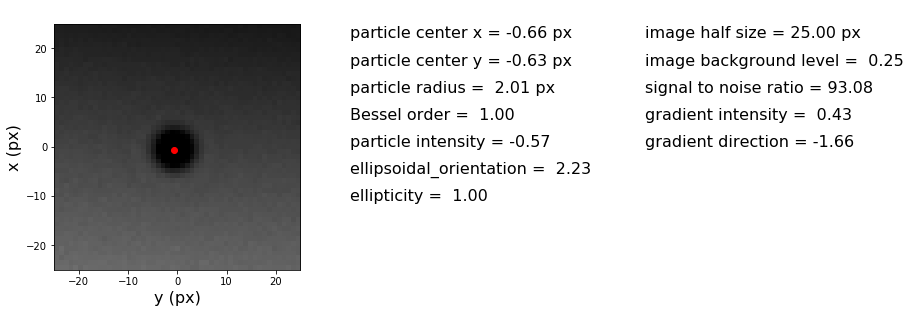

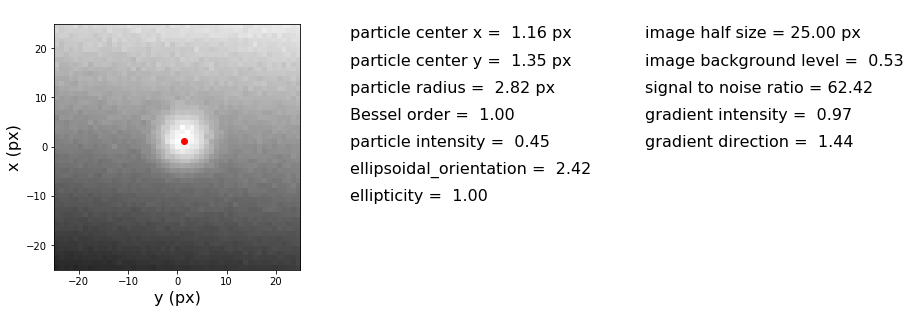

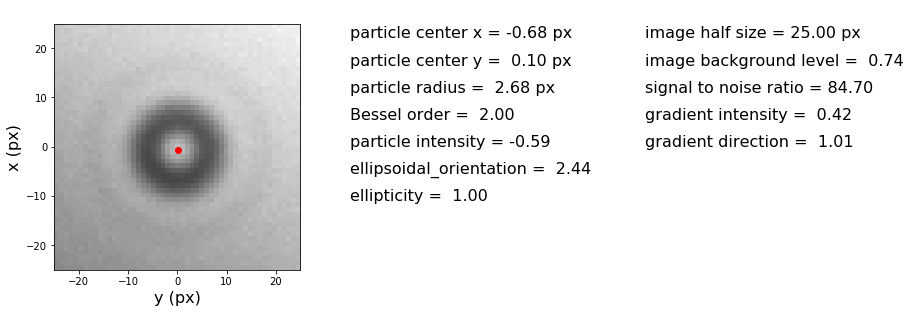

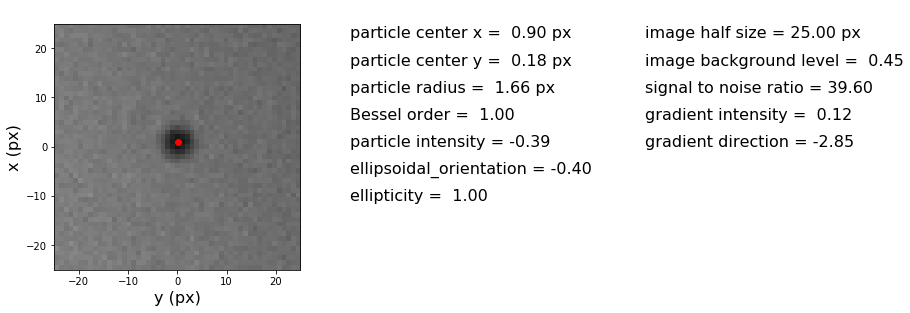

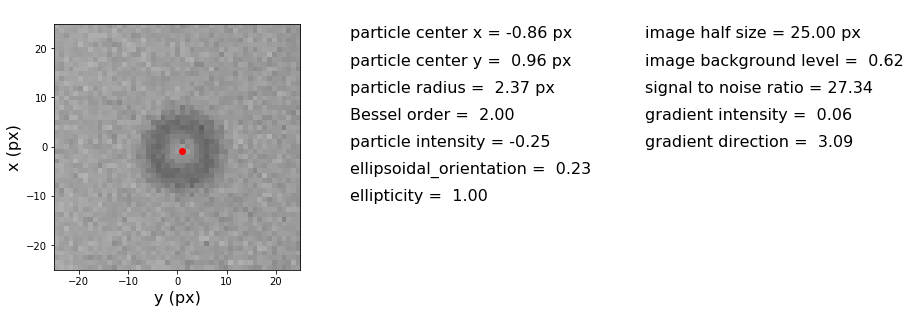

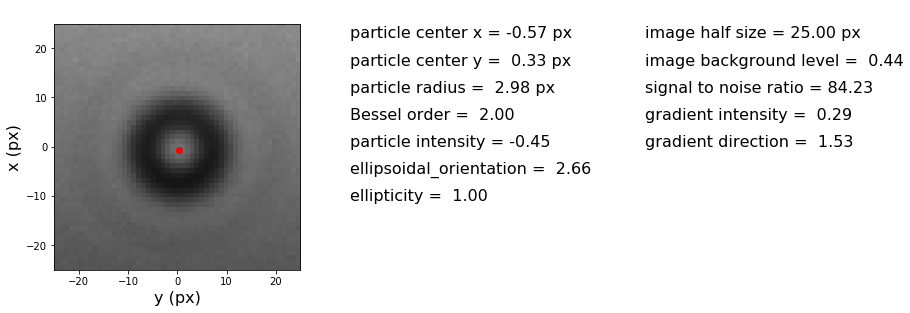

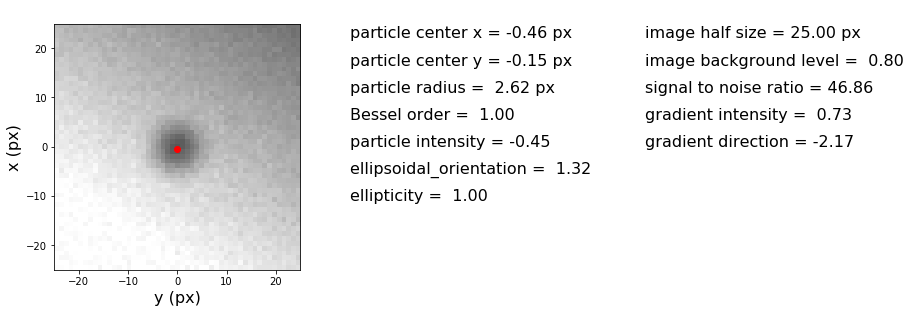

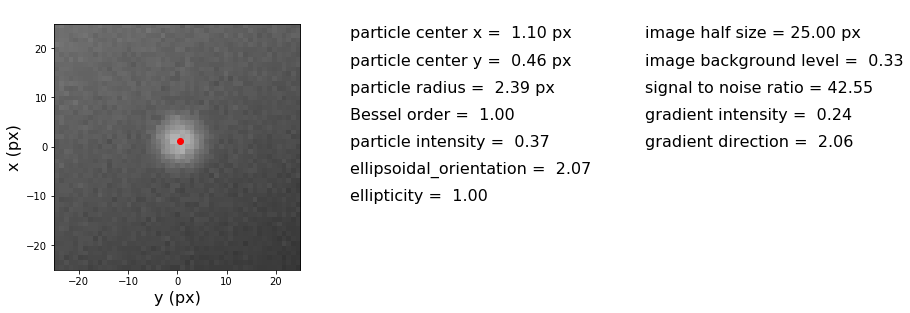

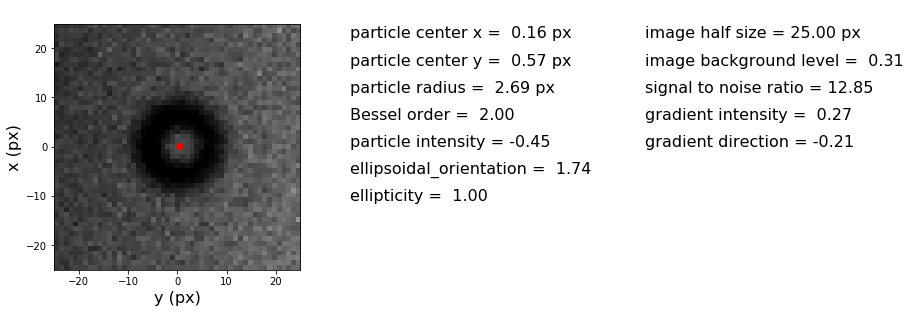

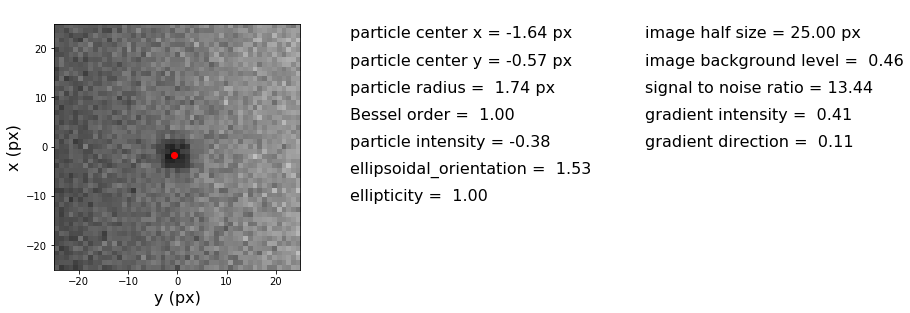

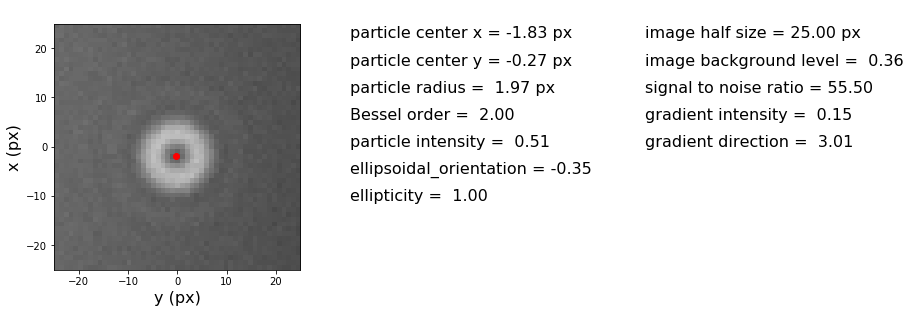

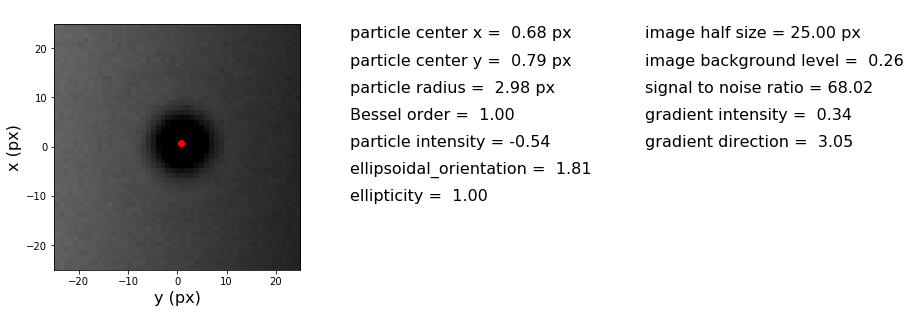

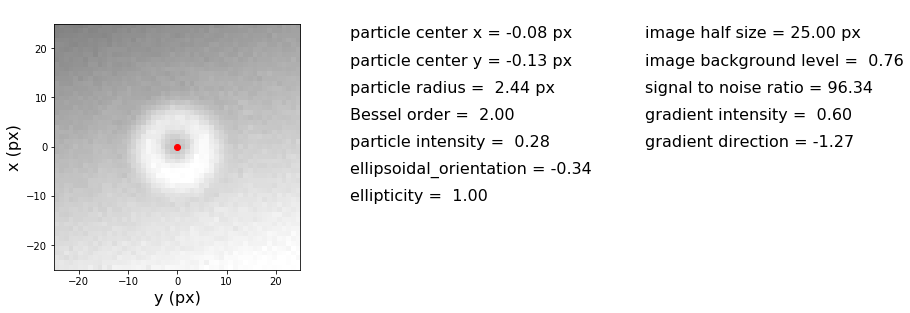

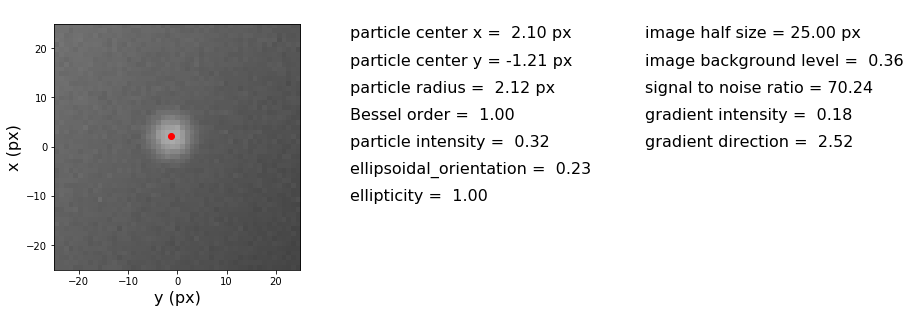

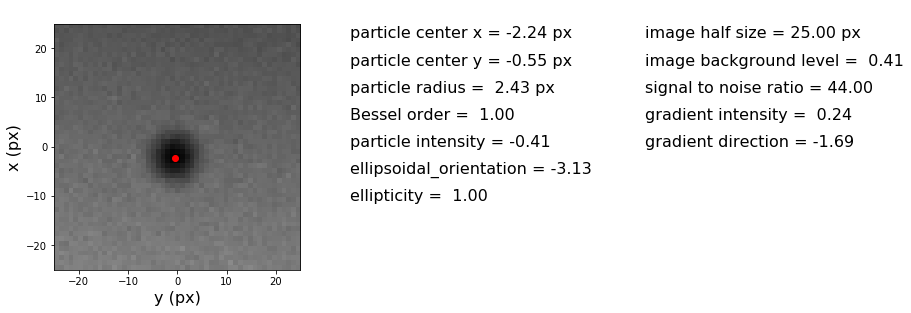

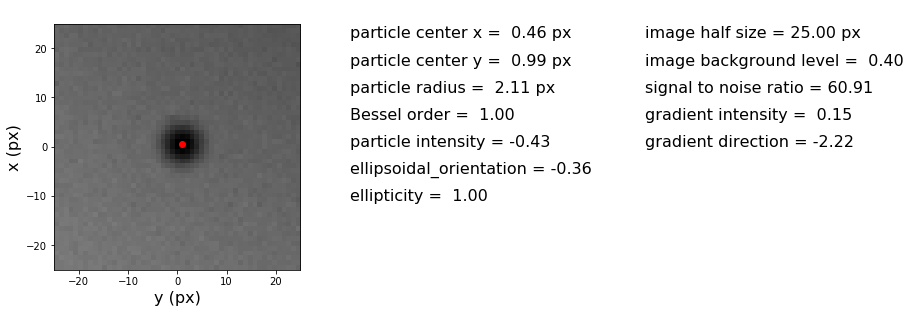

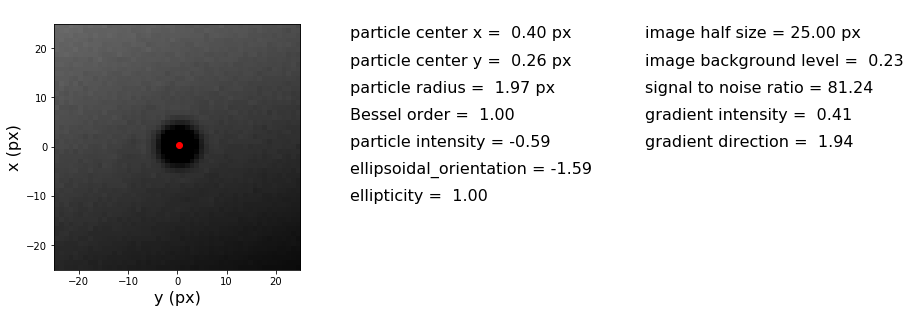

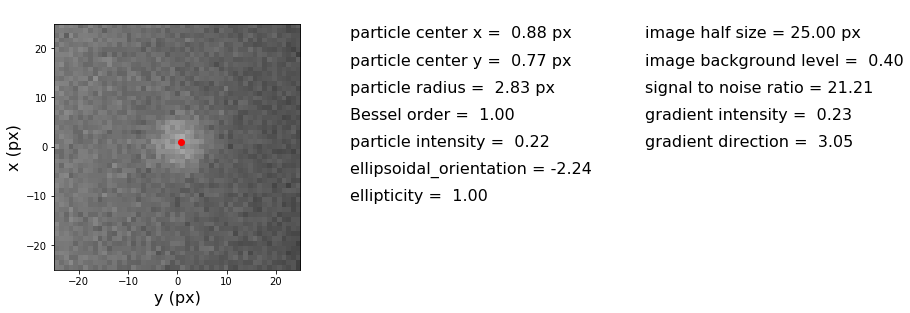

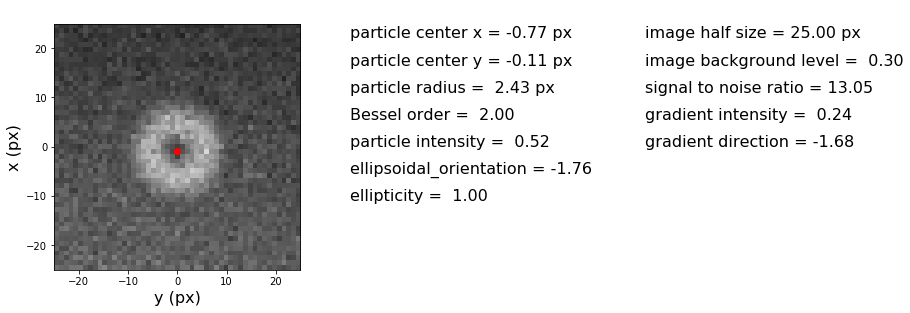

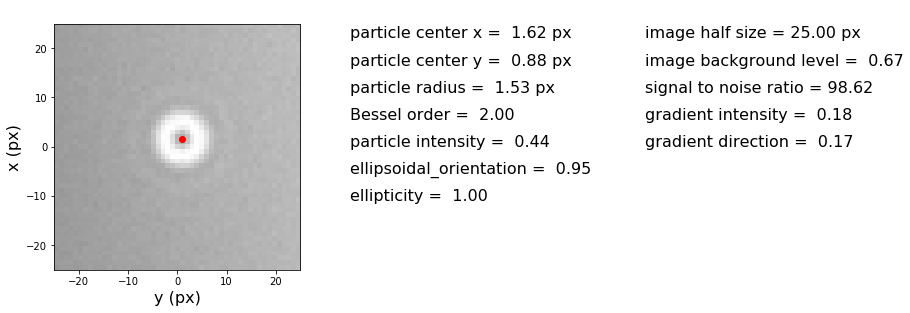

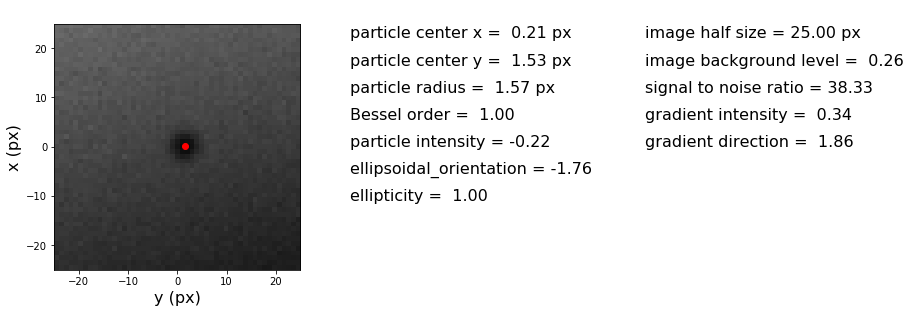

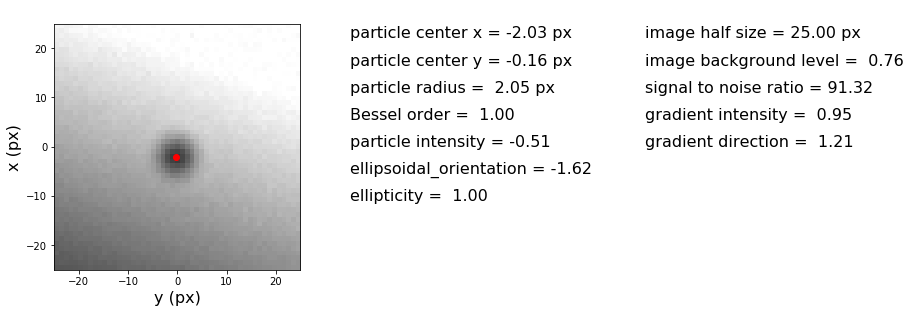

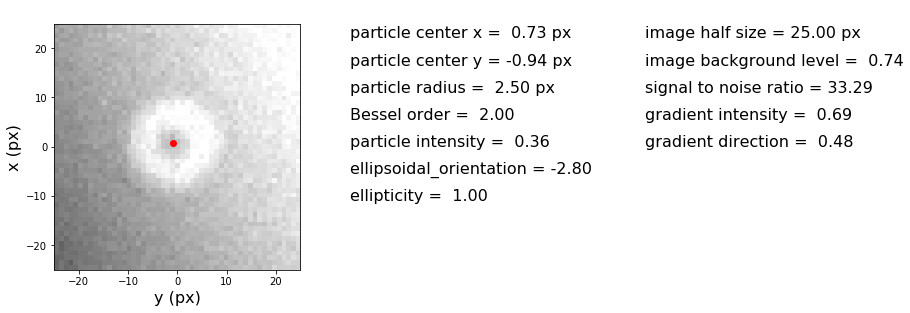

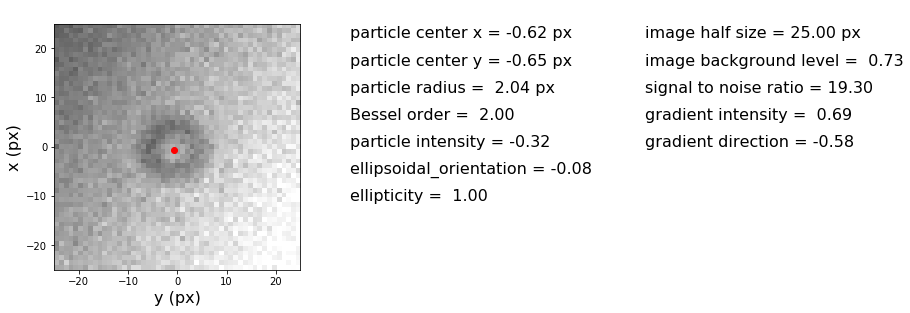

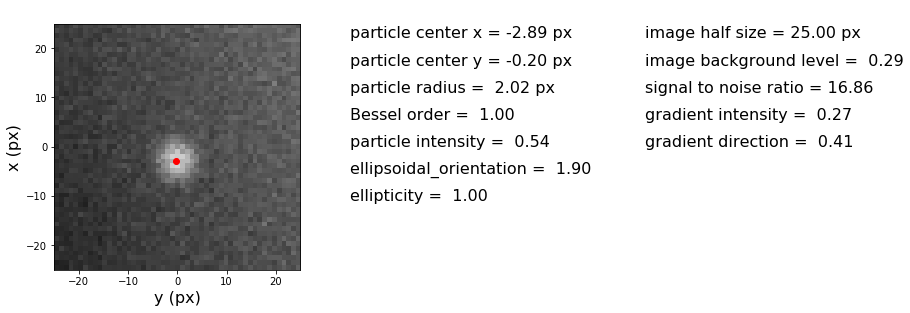

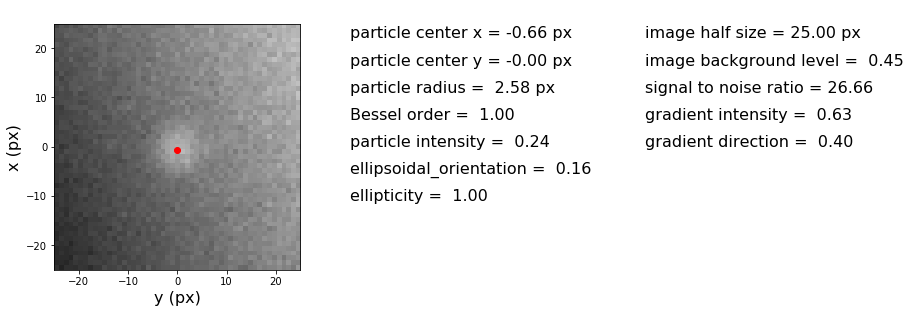

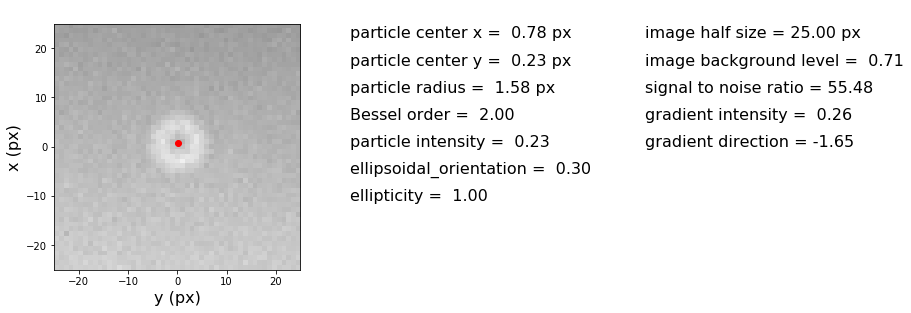

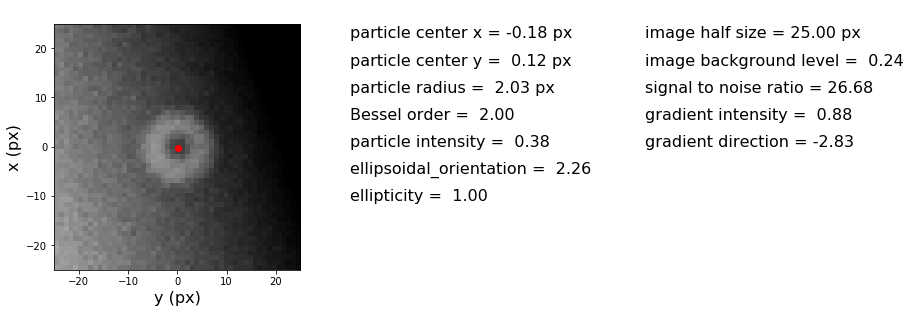

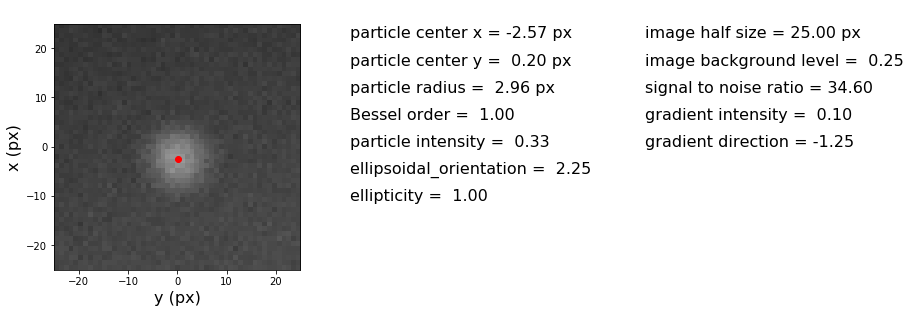

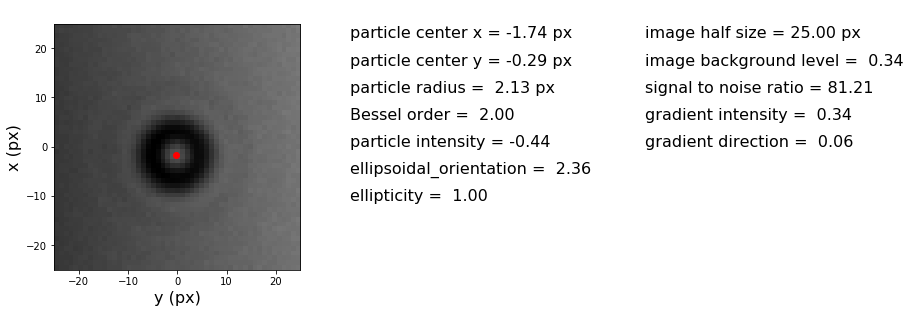

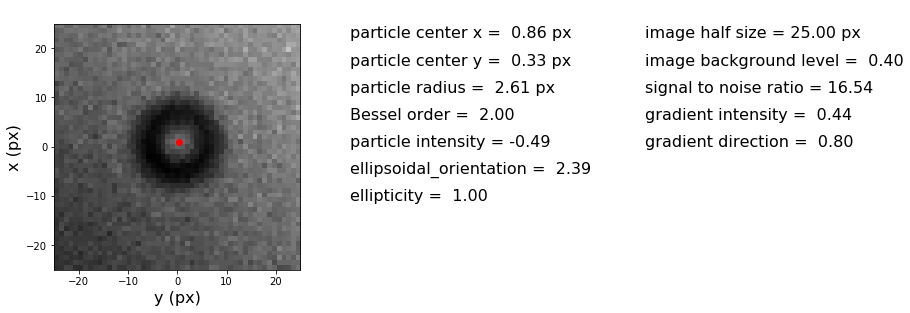

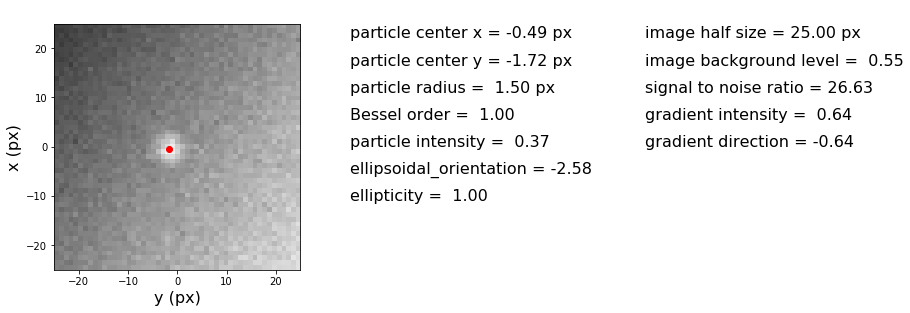

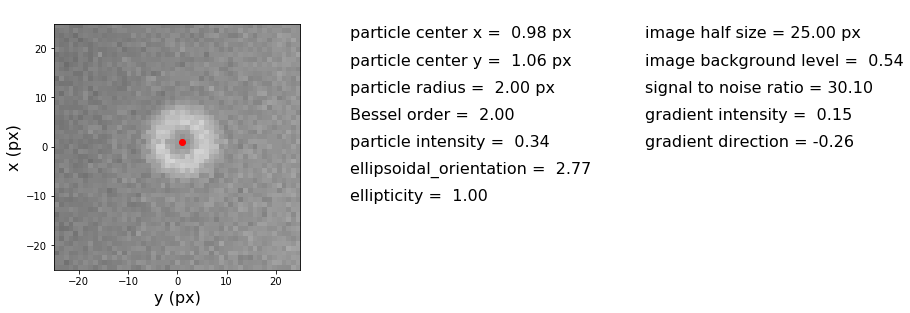

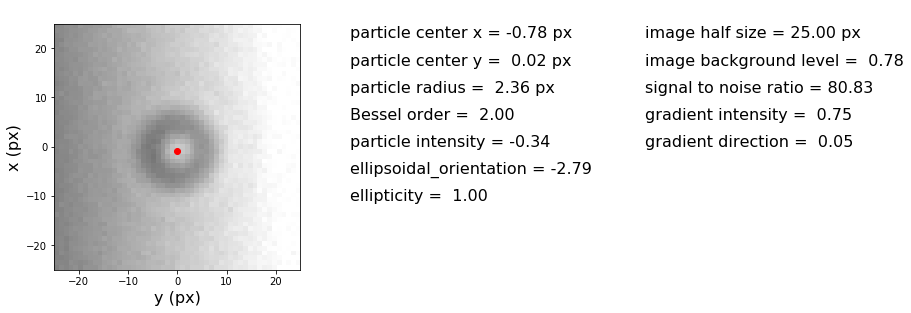

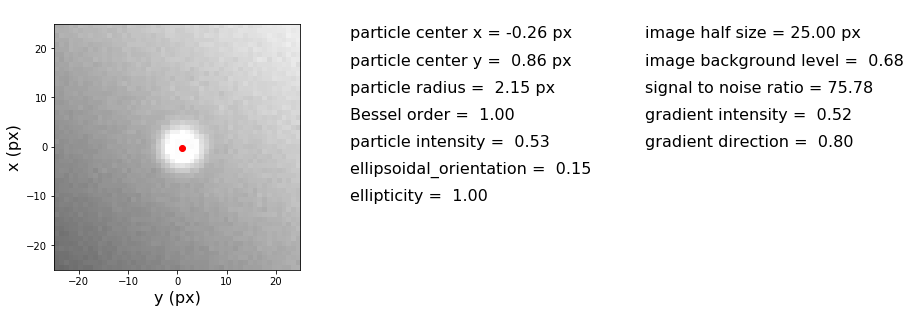

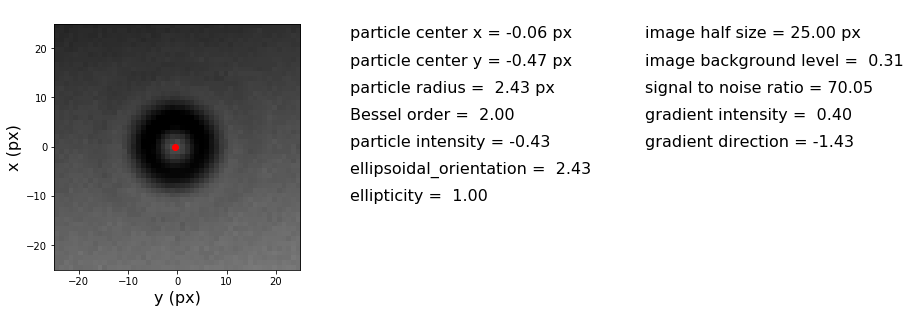

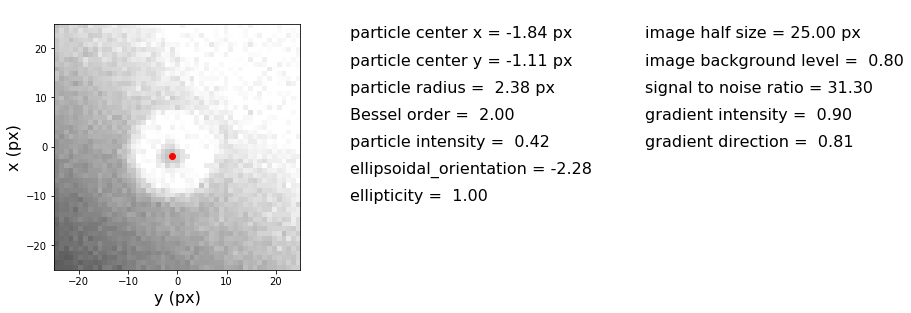

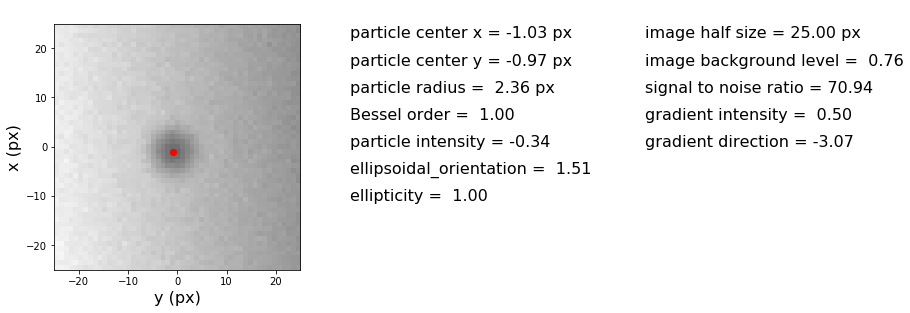

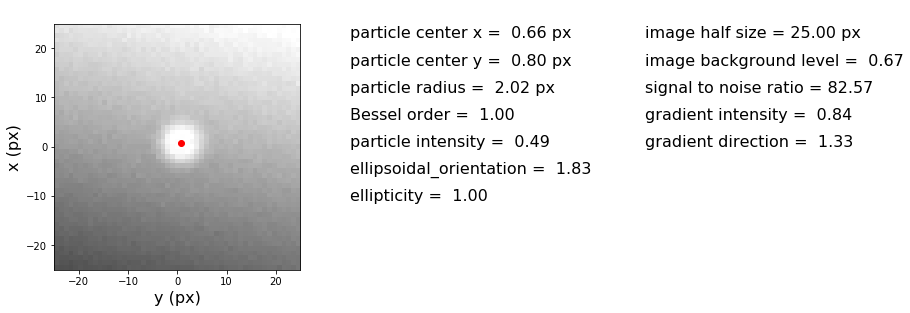

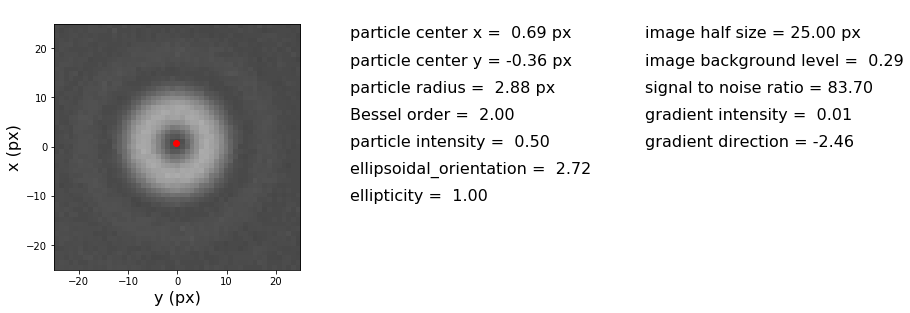

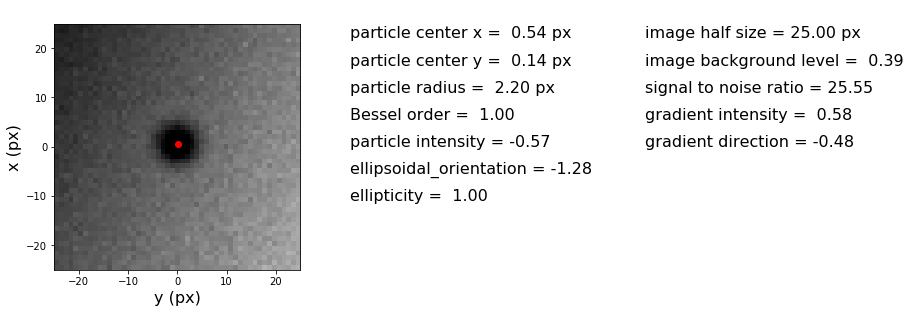

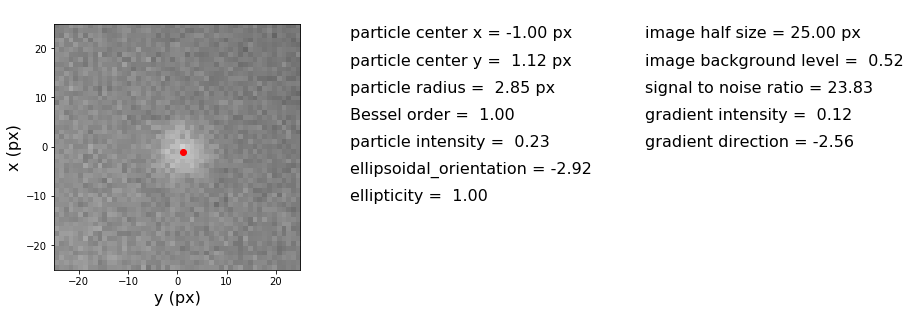

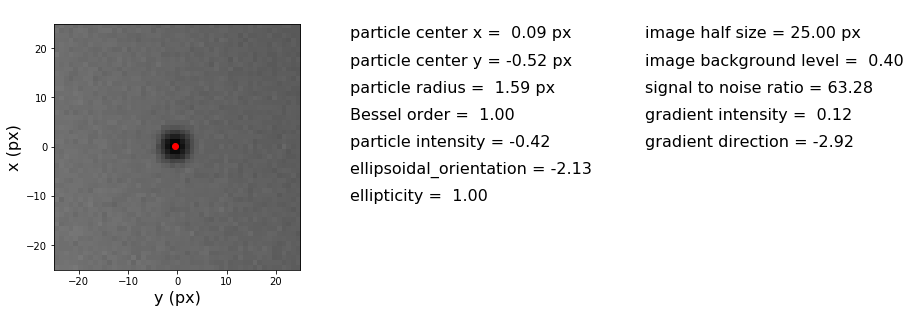

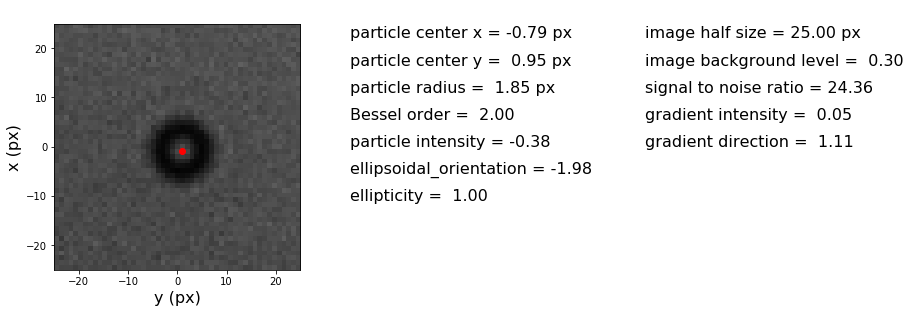

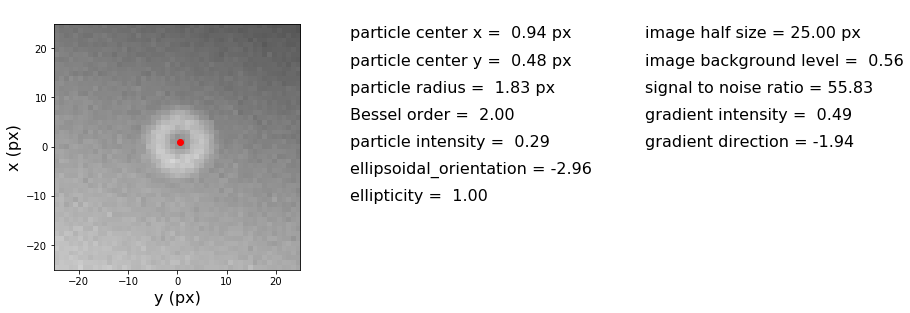

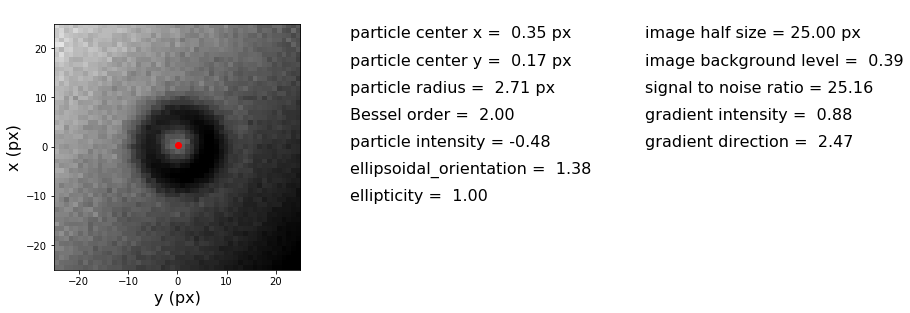

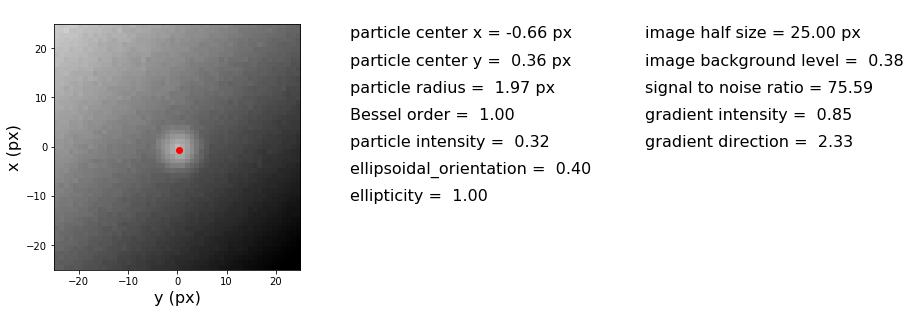

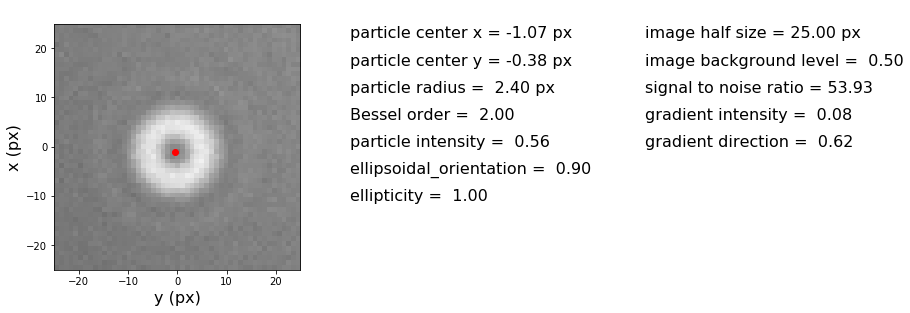

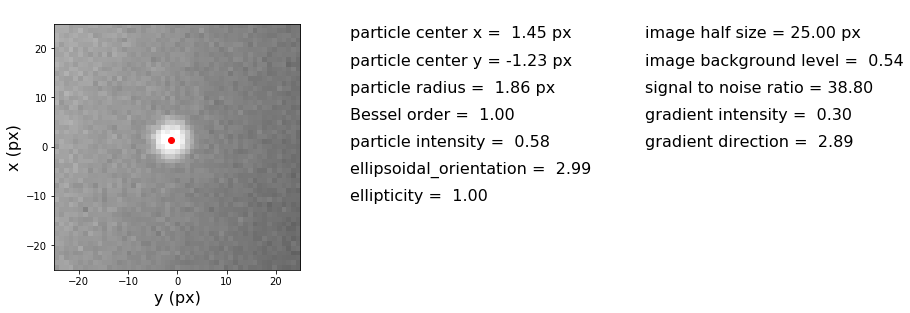

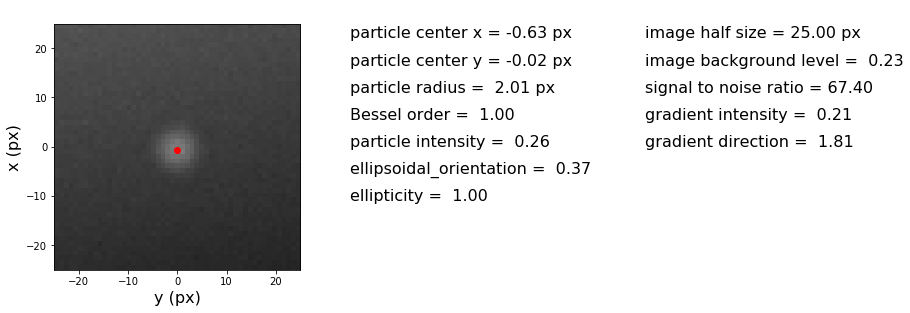

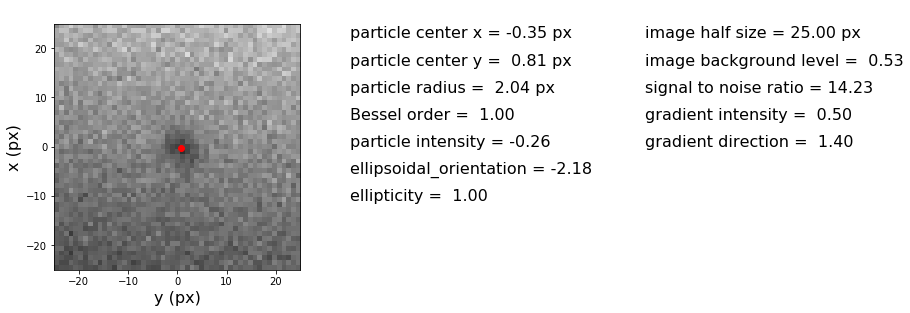

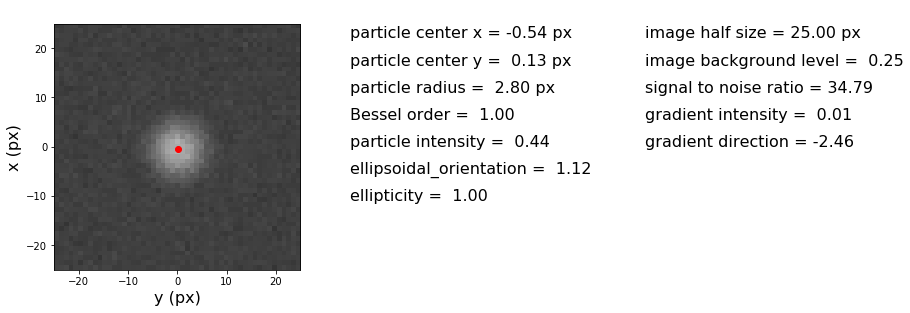

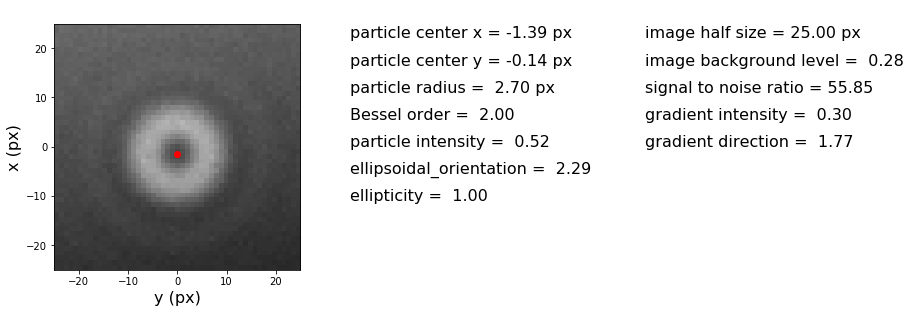

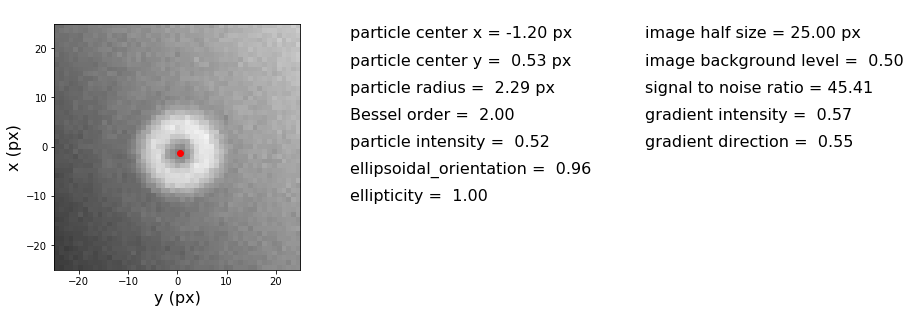

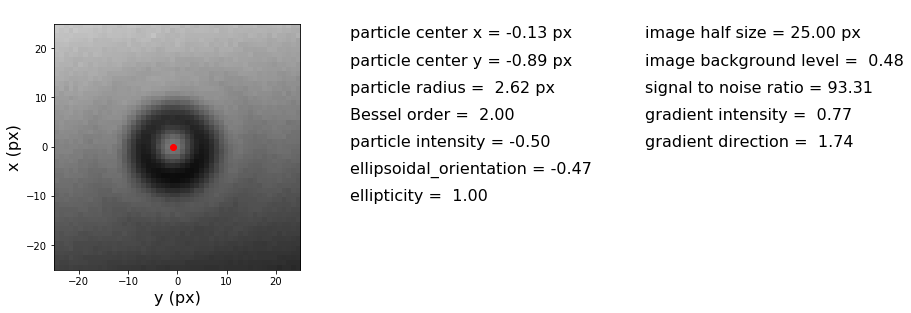

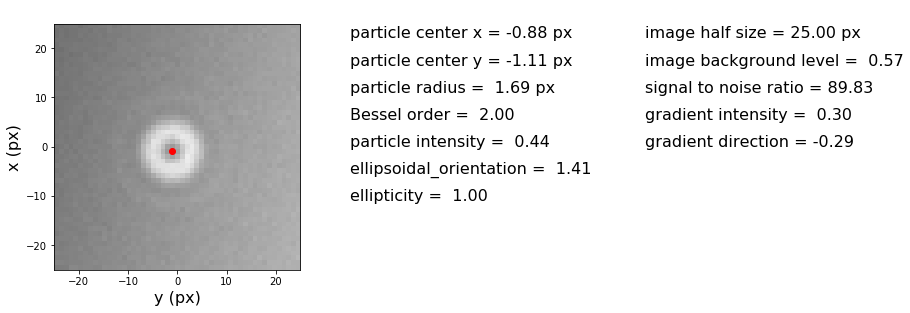

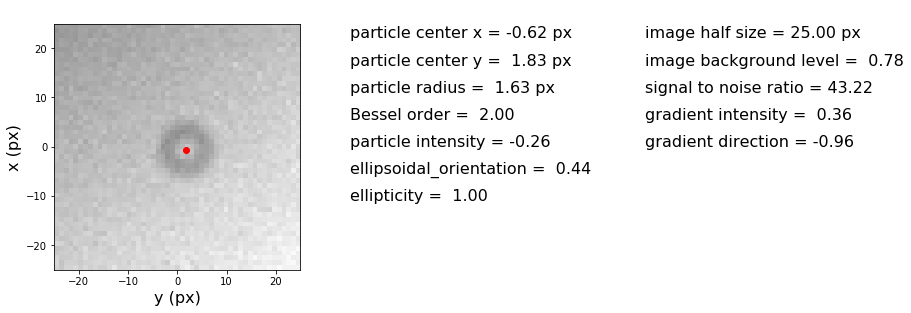

In [2]:
### Define image properties 
%matplotlib inline
from numpy.random import randint, uniform, normal, choice
from math import pi

image_parameters_function = lambda : deeptrack.get_image_parameters(
   particle_center_x_list=lambda : normal(0, 1, 1),
   particle_center_y_list=lambda : normal(0, 1, 1),
   particle_radius_list=lambda : uniform(1.5, 3, 1),
   particle_bessel_orders_list=lambda : [[randint(1, 3), ], ], 
   particle_intensities_list=lambda : [[choice([-1, 1]) * uniform(.2, .6, 1), ], ],
   image_half_size=lambda : 25, 
   image_background_level=lambda : uniform(.2, .8),
   signal_to_noise_ratio=lambda : uniform(10, 100),
   gradient_intensity=lambda : uniform(0, 1), 
   gradient_direction=lambda : uniform(-pi, pi),
   ellipsoidal_orientation=lambda : uniform(-pi, pi, 1),
   ellipticity=lambda : 1)

### Define image generator
image_generator = lambda : deeptrack.get_image_generator(image_parameters_function)

### Show some examples of generated images
number_of_images_to_show = 100

for image_number, image, image_parameters in image_generator():
    if image_number>=number_of_images_to_show:
        break
    
    deeptrack.plot_sample_image(image, image_parameters)

## 3. TEST PRETRAINED DEEP LEARNING NETWORK ON NEW SIMULATED DATA

The pretraiend network saved in the file "DeepTrack - Example 1a - Pretrained network.h5" is loaded and its performance is tested on new simualted images.

Note that the file "DeepTrack - Example 1a - Pretrained network.h5" must be in the same folder as this notebook. 

Comments:
1. The parameter <strong>number_of_predictions_to_show</strong> determines the number of predictions that are shown.
2. <strong>network</strong> is the training file of the pre-trained network. 
3. The <font color=red><strong>red<strong></font> symbol superimposed to the images represents the ground truth particle position.
4. The <font color='#e6661a'><strong>orange<strong></font> symbol is the deep learning network prediction for the position (x, y), and the circle is the prediction for the radial distance r. 

Using TensorFlow backend.


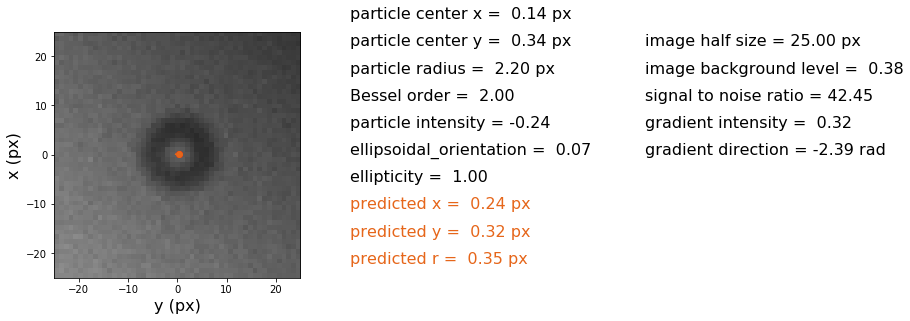

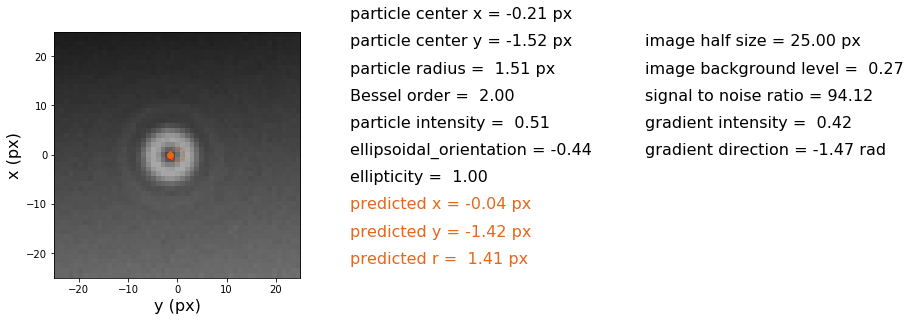

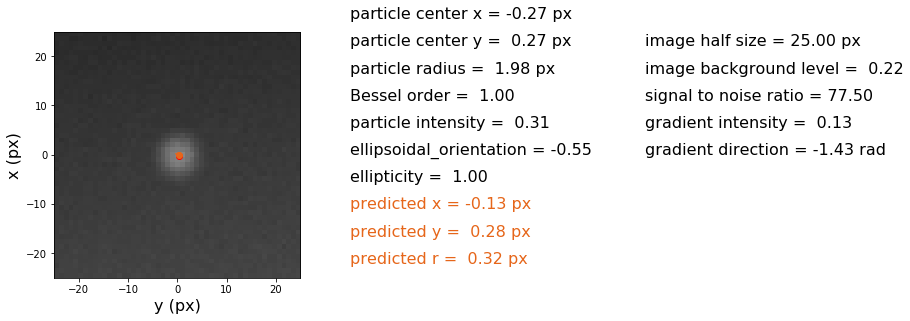

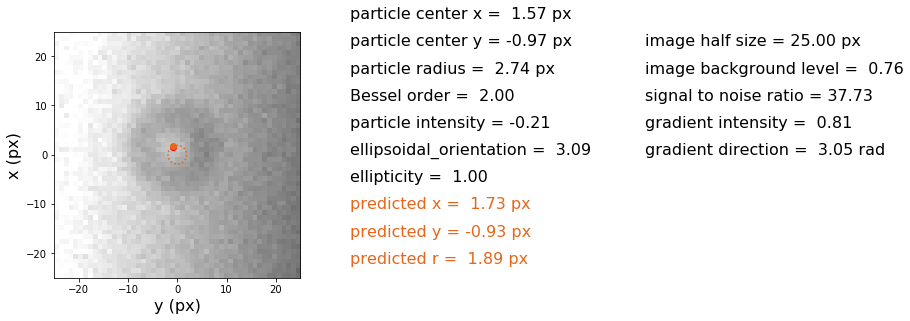

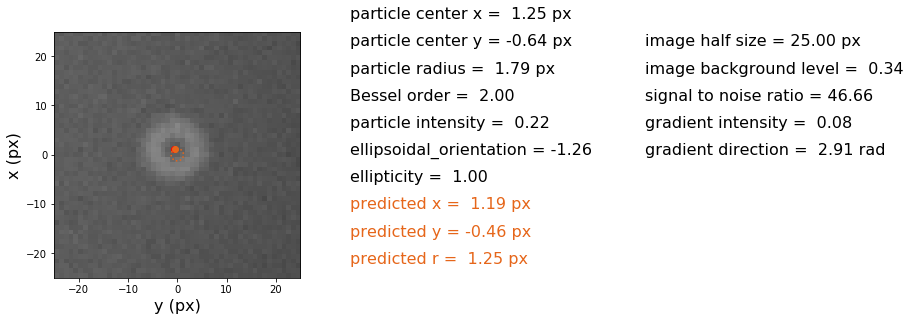

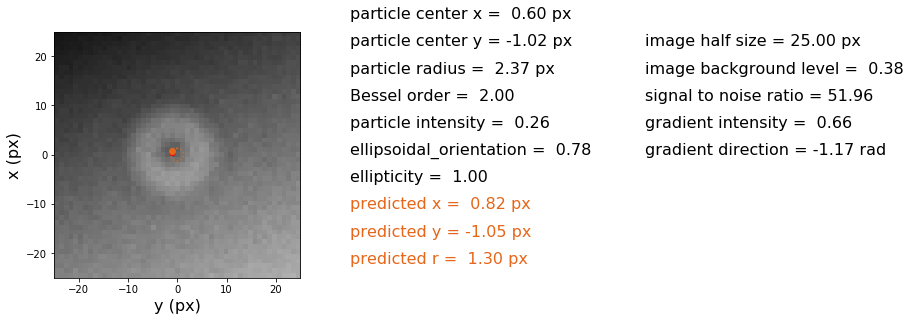

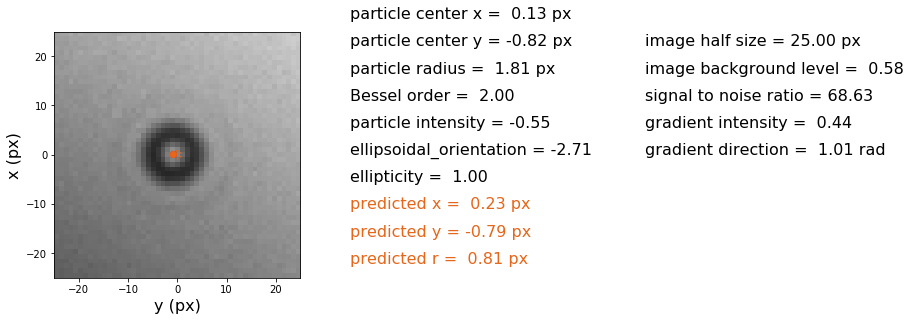

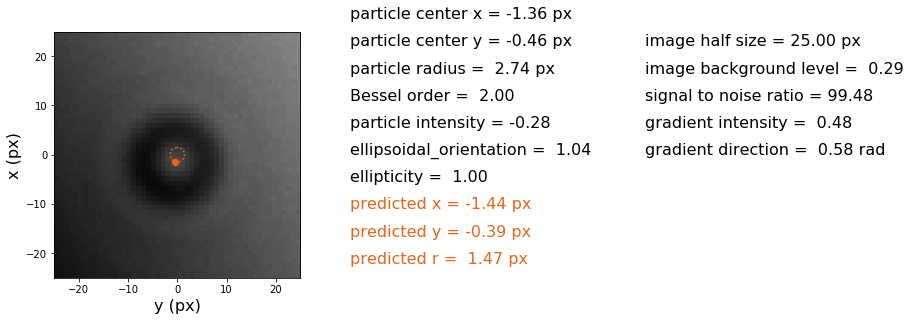

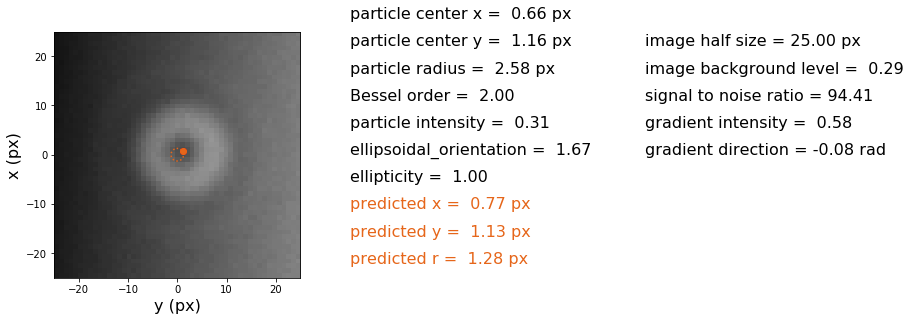

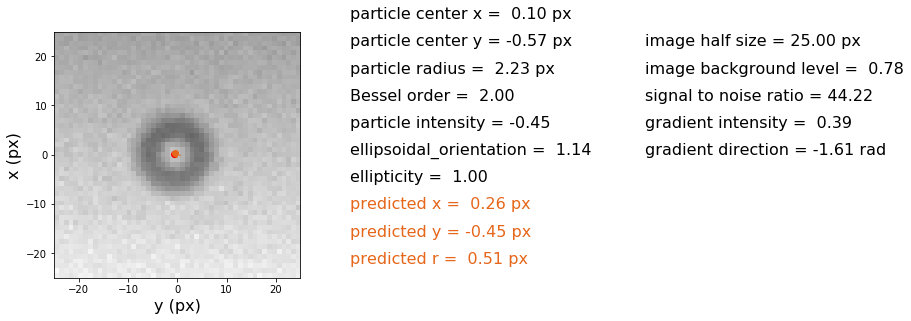

In [3]:
### Load pretrained network
saved_network_file_name = 'DeepTrack - Example 1a - Pretrained network.h5'
network = deeptrack.load(saved_network_file_name)

### Test the predictions of the deep learning network on some generated images
number_of_predictions_to_show = 10

for image_number, image, image_parameters in image_generator():
    if image_number>=number_of_predictions_to_show:
        break
    
    predicted_position = deeptrack.predict(network, image)
    
    deeptrack.plot_prediction(image, image_parameters, predicted_position)